<class 'numpy.ndarray'>
(256, 256, 4) uint8


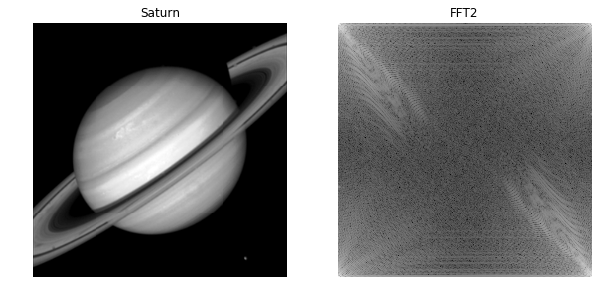

In [1]:
from scipy import fftpack, ndimage 
from skimage import color
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

img = plt.imread('images/saturn.png', 'uint8') # carrega a imagem

gray_im = color.rgb2gray(img) # converte para tons de cinza
fft2 = fftpack.fft2(gray_im) # utiliza função pronta para fft2
fft2_scaled = 10*np.log10(abs(fft2)) # escala em dB para melhorar visualização


# configurações do print
print(type(img))
print(img.shape, img.dtype)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Saturn')
plt.axis('off')
plt.subplot(122)
plt.imshow(fft2_scaled, cmap=plt.cm.gray) 
plt.title('FFT2')
plt.axis('off')
plt.show()

In [2]:
# Primeiro as linhas, depois as colunas
xfft_im = np.apply_along_axis(lambda x: np.fft.fft(x), 0, gray_im) #FFT no eixo x da imagem
xfft_scaled = 10*np.log10(abs(xfft_im))
xyfft_im = np.apply_along_axis(lambda y: np.fft.fft(y), 1, xfft_im) #FFT no eixo y da imagem
xyfft_scaled = 10*np.log10(abs(xyfft_im))

# Primeiro as colunas, depois as linhas
yfft_im = np.apply_along_axis(lambda y: np.fft.fft(y), 1, gray_im) #FFT no eixo y da imagem
yfft_scaled = 10*np.log10(abs(yfft_im))
yxfft_im = np.apply_along_axis(lambda x: np.fft.fft(x), 0, yfft_im) #FFT no eixo x da imagem
yxfft_scaled = 10*np.log10(abs(yxfft_im))


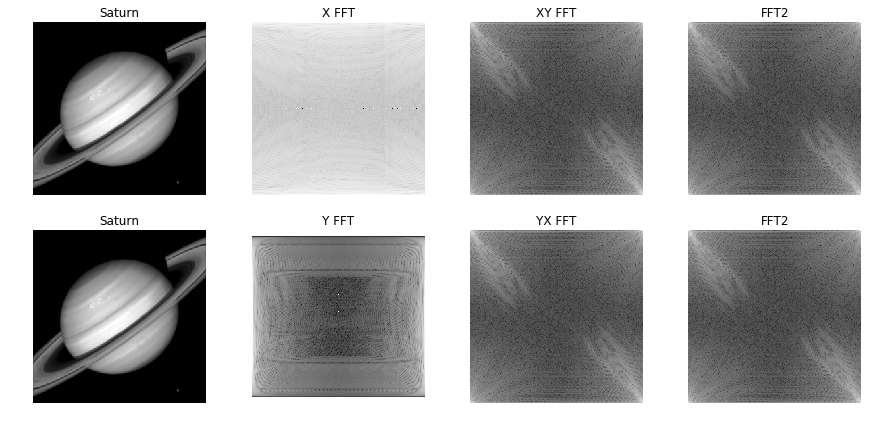

In [3]:
# configurações do plot
plt.figure(figsize=(15,7))
plt.subplot(241)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Saturn')
plt.axis('off')
plt.subplot(242)
plt.imshow(xfft_scaled, cmap=plt.cm.gray) 
plt.title('X FFT')
plt.axis('off')
plt.subplot(243)
plt.imshow(xyfft_scaled, cmap=plt.cm.gray) 
plt.title('XY FFT')
plt.axis('off')
plt.subplot(244)
plt.imshow(fft2_scaled, cmap=plt.cm.gray) 
plt.title('FFT2')
plt.axis('off')
plt.subplot(245)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Saturn')
plt.axis('off')
plt.subplot(246)
plt.imshow(yfft_scaled, cmap=plt.cm.gray) 
plt.title('Y FFT')
plt.axis('off')
plt.subplot(247)
plt.imshow(yxfft_scaled, cmap=plt.cm.gray) 
plt.title('YX FFT')
plt.axis('off')
plt.subplot(248)
plt.imshow(fft2_scaled, cmap=plt.cm.gray) 
plt.title('FFT2')
plt.axis('off')


plt.show()

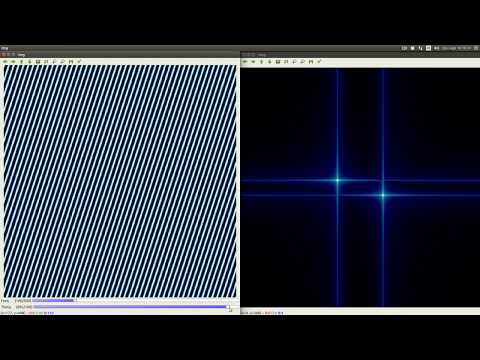

In [4]:
from IPython.lib.display import YouTubeVideo

YouTubeVideo('uD2BerBmnUs', width=600, height=400) # demonstração da fft2

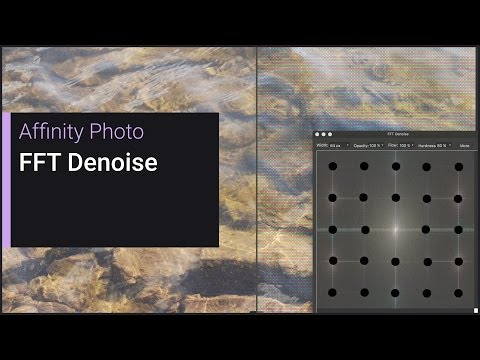

In [5]:
YouTubeVideo('6wfeMGwcF0c', width=600, height=400) # aplicação de FFT para remoção de ruído